### Edgar Moises Hernandez-Gonzalez
#### 10/06/20
#### Imagen de CWT de EEG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2

In [2]:
# canal C4 es el 19
# 18*1344 = 24192, 19*1344 = 25536
# 18*1024 = 18432, 19*1024 = 19456
# 18*1344+160 = 24352, 19*1344-160 = 25376
canalC4 = pd.read_csv("MeCa01ACLL-1.csv", header=None).iloc[1, 24352:25376]
# canalC4 = pd.read_csv("VentaneoMC-01-1.csv", header=None).iloc[1, 18432:19456]

In [3]:
canalC4.shape

(1024,)

(1024,)


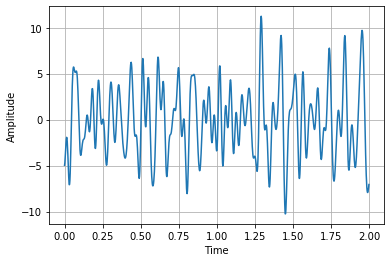

In [4]:
fs = 512
# time = np.arange(0, 2.625, 1/fs)
time = np.arange(0, 2, 1/fs)
sig = canalC4
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
frecuencias = pywt.scale2frequency('cmor3-3', [2,4,8,16,32,64,128,256,512,1024]) / (1/fs)
print("Frecuencias para diferentes escalas cmor3-3: \n", frecuencias)

Frecuencias para diferentes escalas cmor3-3: 
 [768.  384.  192.   96.   48.   24.   12.    6.    3.    1.5]


In [6]:
coef, freqs = pywt.cwt(sig, np.arange(1,225), 'cmor3-3')

In [7]:
x = abs(coef)

(224, 1024)


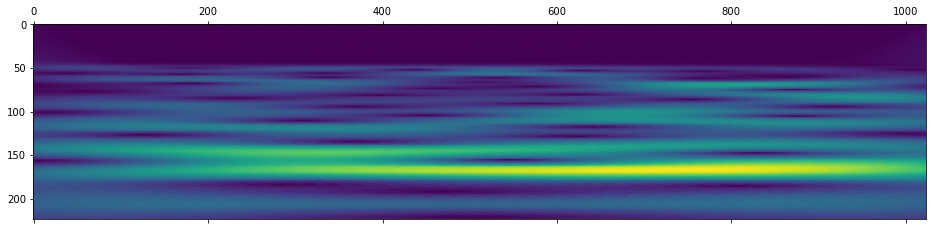

In [8]:
print(x.shape)
plt.matshow(x)
plt.show()

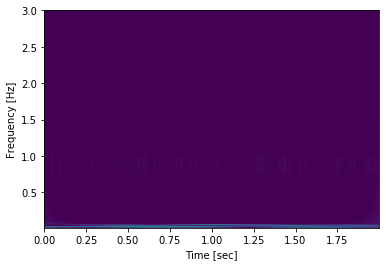

In [9]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

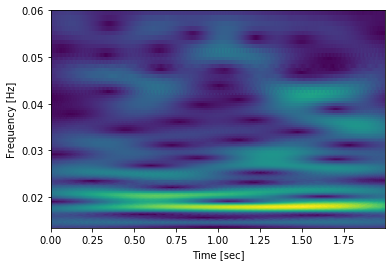

In [10]:
# Zoom
plt.pcolormesh(time, freqs, x)
plt.axis([0, time[-1:], freqs[-1:], 0.06])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [11]:
x2 = x[-160:, :]

In [12]:
x2.shape

(160, 1024)

(160, 1024)


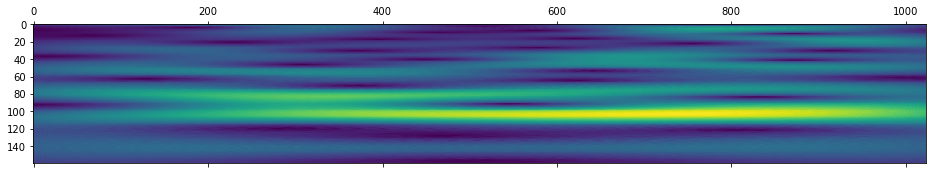

In [13]:
print(x2.shape)
plt.matshow(x2)
plt.show()

(40, 256)


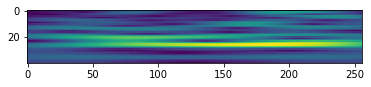

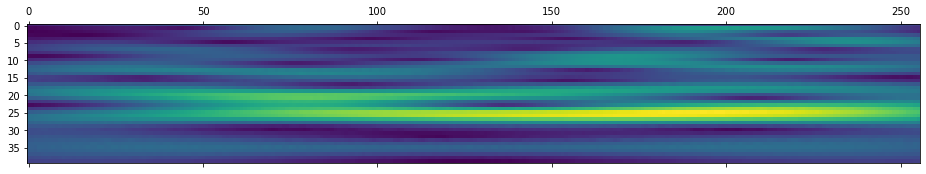

In [14]:
# en el resize los dos se dividen entre 4
dim = (256, 40) #ancho, alto

resized = cv2.resize(x2, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()